In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\ Downloads\spam.csv", encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5206,ham,I will reach ur home in &lt;#&gt; minutes,NaN,NaN,NaN
1768,ham,How. Its a little difficult but its a simple w...,NaN,NaN,NaN
3135,ham,Can you let me know details of fri when u find...,NaN,NaN,NaN
3089,ham,Am going to take bath ill place the key in win...,NaN,NaN,NaN
428,ham,7 at esplanade.. Do Ì_ mind giving me a lift c...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Steps involved:
#     1. Data Cleaning
#     2. EDA
#     3. Text Preprocessing
#     4. Model Building
#     5. Evaluation
#     6. Improvement
#     7. Website
#     8. Deployment

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# dropping last three cols as there are very less non-null values

df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renaming columns
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace = True)
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#using label encoder to change target values to numericals

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']= encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#checking missing values
df.isnull().sum()

target    0
sms       0
dtype: int64

In [15]:
# checking duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# #EDA

In [19]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

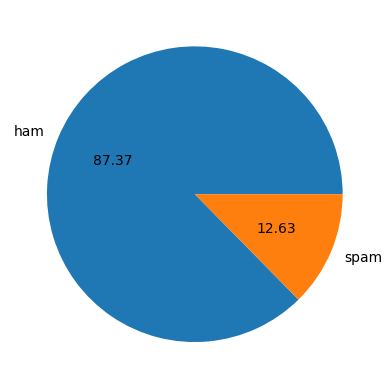

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyashu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# no of chars in sms text
df['num_chars']=df['sms'].apply(len)

In [26]:
df.head()

,target,sms,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# fetching num_of words by breaking sms on basis of words
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,sms,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df.head()

,target,sms,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# breaks sentences on the basis of sentences
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,sms,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.columns

Index(['target', 'sms', 'num_chars', 'num_words', 'num_sentences'], dtype='object')

In [33]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#ham messages
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

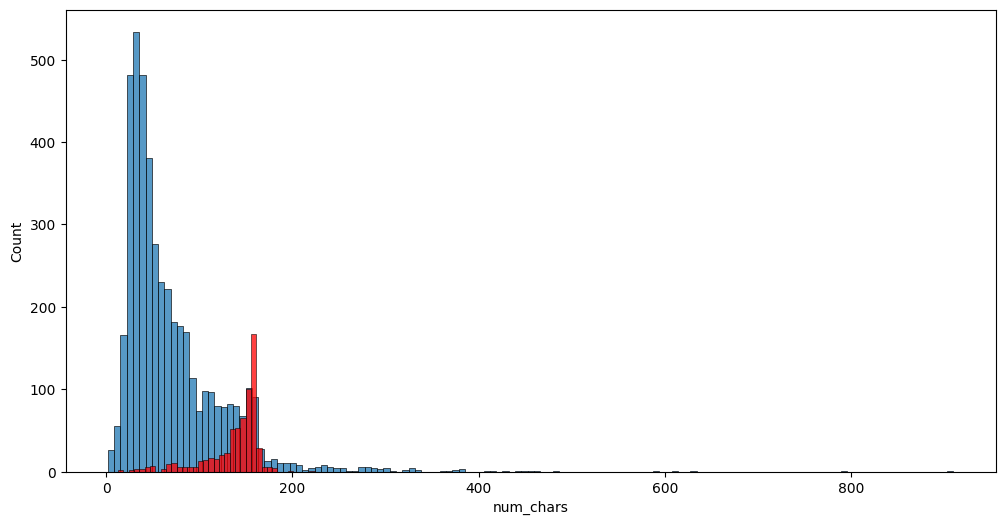

In [37]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

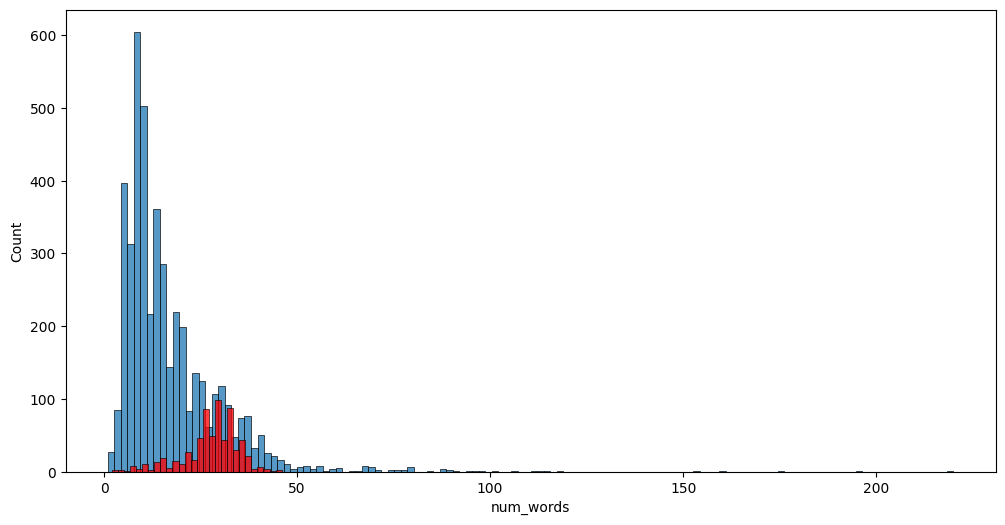

In [38]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

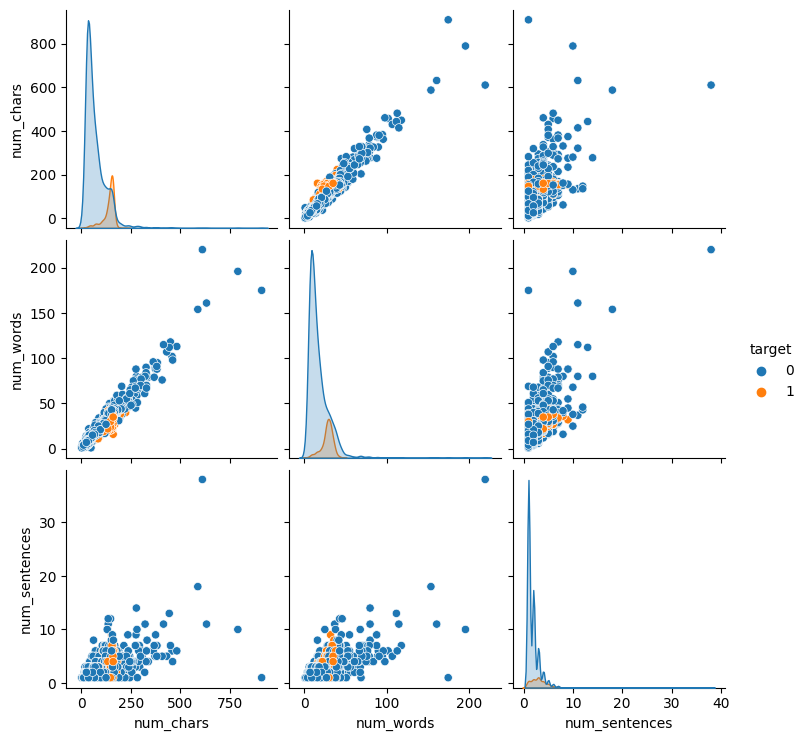

In [39]:
 sns.pairplot(df, hue = 'target')

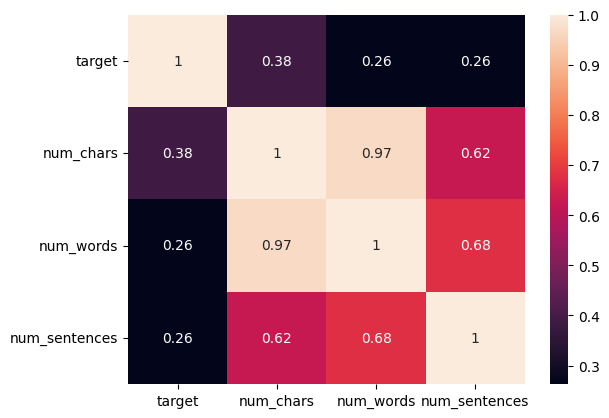

In [40]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

Data preprocessing

Lowercase
Tokenization
removing special chars
removing stop words 
stemming

In [41]:
from nltk.corpus import stopwords
stopwords.words("english")

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [43]:
def transform_text(sms):
    sms = sms.lower()
    sms = nltk.word_tokenize(sms)

    y = []
    for i in sms:
        if i.isalnum(): #alphanumeric
            y.append(i)

    sms = y[:]
    y.clear()

    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)    

    text = y[:]
    y.clear()
    for i in sms:
        y.append(ps.stem(i))
    return " ".join(y)

In [44]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat'

In [45]:
df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [46]:
df['transformed_text'] = df['sms'].apply(transform_text)

In [47]:
df.head()

,target,sms,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [48]:
#to find most words used in spam msgs
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

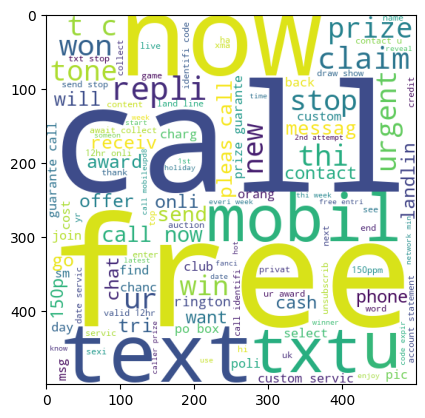

In [50]:
plt.imshow(spam_wc)

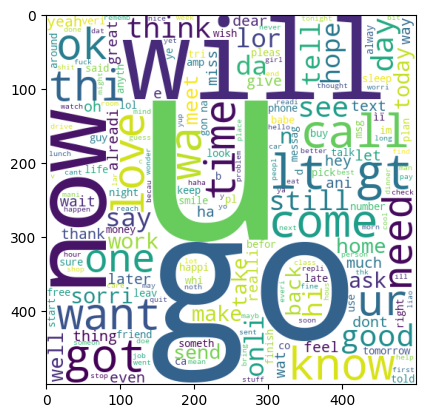

In [51]:
#to find most words used in ham msgs
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [52]:
#finding top 30 spam and ham words used in sms
#custom code
#extracting spam msgs
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [53]:
len(spam_corpus)

14475

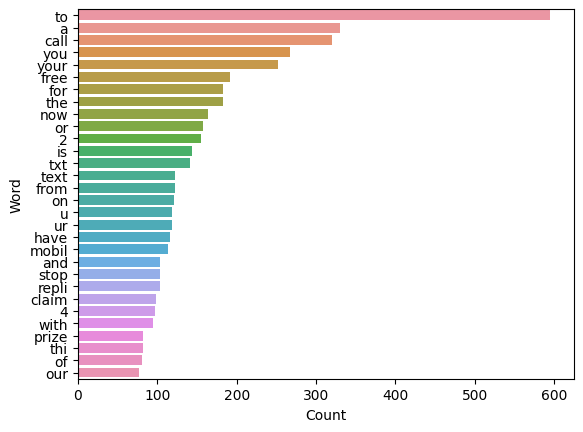

In [54]:
#creating dictionary about the no. of occurence of each word
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# Assuming 'spam_corpus' is your list of words
word_counts = Counter(spam_corpus)
common_words = word_counts.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Count', y='Word', data=df_common_words)
plt.xticks(rotation='horizontal')
# Show the plot
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [56]:
len(ham_corpus)

62812

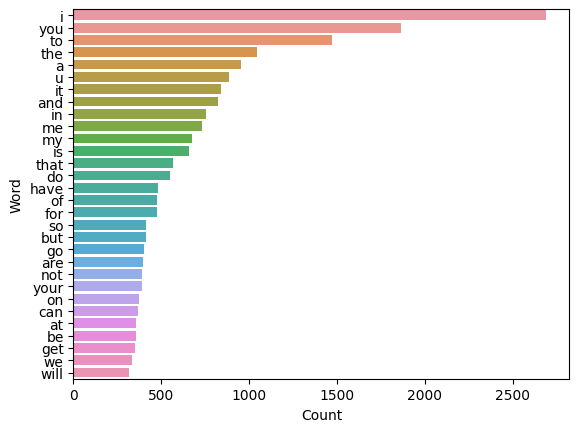

In [57]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# Assuming 'spam_corpus' is your list of words
word_counts = Counter(ham_corpus)
common_words = word_counts.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Count', y='Word', data=df_common_words)
plt.xticks(rotation='horizontal')
# Show the plot
plt.show()

#Model Building

In [58]:
#Text Vectorization
#using bag of words : we check the most frequently used words and make a column for that and then we check 
#in every sms how many times those words are being used then number that we get are called vectors
df.head()

,target,sms,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [92]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [93]:
X.shape

(5169, 3000)

In [94]:
y = df['target'].values

In [95]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [98]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [99]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [100]:
#training'

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8771760154738878
[[792 104]
 [ 23 115]]
0.5251141552511416


In [101]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]
1.0


In [102]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9806576402321083
[[893   3]
 [ 17 121]]
0.9758064516129032


In [103]:
#we chose tfidf with mnb

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [105]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc =  KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state = 2)
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
# bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state = 2)
# xgb = XGBClassifier(n_estimators=50, random_state = 2)

In [106]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    # 'BgC' : bc,
    'ETC' : etc,
    # 'GBDT' : gbdt,
    # 'xgb' : xgb
}

In [107]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [108]:
train_classifier(svc,X_train, y_train, X_test, y_test)

(0.9816247582205029, 0.983739837398374)

In [109]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.84375
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9459459459459459
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.928
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333


In [78]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy', ascending = False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.976789,0.967213
7,ETC,0.973888,0.982609
6,AdaBoost,0.967118,0.948276
5,RF,0.965184,1.000000
4,LR,0.955513,0.933962
2,NB,0.948743,1.000000
3,DT,0.937137,0.847619
1,KN,0.902321,1.000000


In [85]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [88]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.976789
1,ETC,Accuracy,0.973888
2,AdaBoost,Accuracy,0.967118
3,RF,Accuracy,0.965184
4,LR,Accuracy,0.955513
5,NB,Accuracy,0.948743
6,DT,Accuracy,0.937137
7,KN,Accuracy,0.902321
8,SVC,Precision,0.967213
9,ETC,Precision,0.982609


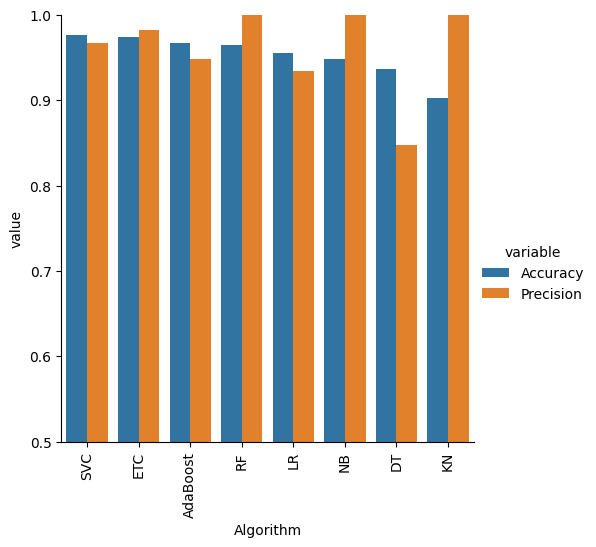

In [90]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [112]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [113]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [114]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [115]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [116]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.976789,0.967213,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
1,ETC,0.973888,0.982609,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
2,AdaBoost,0.967118,0.948276,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000
3,RF,0.965184,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
4,LR,0.955513,0.933962,0.962282,0.945946,0.962282,0.945946,0.962282,0.945946
5,NB,0.948743,1.000000,0.968085,1.000000,0.968085,1.000000,0.968085,1.000000
6,DT,0.937137,0.847619,0.930368,0.843750,0.930368,0.843750,0.930368,0.843750
7,KN,0.902321,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000


In [117]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [118]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [119]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [120]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [121]:
import pickle

In [123]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))